<a href="https://colab.research.google.com/github/sriram403/MachineLearningBlogs/blob/main/ImageClassificationRealWorld_Satellite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Satellite image Classification Dataset-RSI-CB256 🛰
https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification?select=data

**Remote sensing(RS) is the process of detecting and monitoring the physical characteristics of an area by measuring its reflected and emitted radiation at a distance (typically from satellite or aircraft).**

##Loading Data 

In [ ]:
# !unzip "/content/drive/MyDrive/Satellite Image/satellite.zip" -d "/content/drive/MyDrive/Satellite Image"

In [ ]:
!ls "/content/drive/MyDrive/Satellite Image/data"

cloudy	desert	green_area  water


In [ ]:
import os
class_names = os.listdir("/content/drive/MyDrive/Satellite Image/data")
class_names

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
for filedir,filename,image in os.walk("/content/drive/MyDrive/Satellite Image/data"):
  print(f"In {filedir} there are {len(filename)} files and it contains {len(image)} images")

In /content/drive/MyDrive/Satellite Image/data there are 4 files and it contains 0 images
In /content/drive/MyDrive/Satellite Image/data/cloudy there are 0 files and it contains 1500 images
In /content/drive/MyDrive/Satellite Image/data/desert there are 0 files and it contains 1131 images
In /content/drive/MyDrive/Satellite Image/data/green_area there are 0 files and it contains 1500 images
In /content/drive/MyDrive/Satellite Image/data/water there are 0 files and it contains 1500 images


##visualizing the picture

In [ ]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim

def visualize_image(dir,class_name):
    chossen_image = dir+"/"+class_name
    random_image = random.sample(os.listdir(chossen_image),1)
    img_data = mpim.imread(chossen_image + "/" + random_image[0] )
    
    plt.figure(figsize=(10,7))
    plt.imshow(img_data)
    plt.title(class_name)
    plt.axis(False)



In [ ]:
class_names

['cloudy', 'desert', 'green_area', 'water']

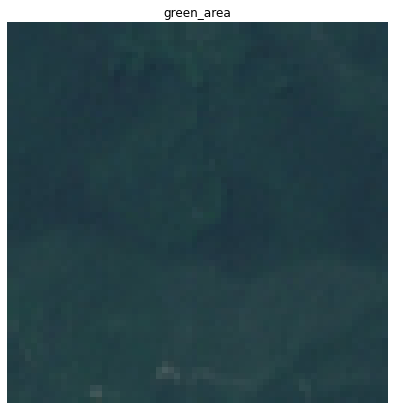

In [ ]:
dir = "/content/drive/MyDrive/Satellite Image/data"
visualize_image(dir,class_names[2])

##Splitting the train_and_test_dir

In [ ]:
x = os.listdir("/content/drive/MyDrive/Satellite Image/data/desert/")
len(x)

1131

In [ ]:
1131*0.8

904.8000000000001

In [ ]:
def splitting_train_test_data(dir,class_name):
  chossen_dir = dir +"/" + class_name
  all_the_images = os.listdir(chossen_dir)
  # random.shuffle(all_the_images)
  index = int(len(all_the_images)*0.9)
  return all_the_images[:index],all_the_images[index:]

In [ ]:
dir = "/content/drive/MyDrive/Satellite Image/data/"
class_names

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
desert_train,desert_test = splitting_train_test_data(dir,class_names[1])
len(desert_train)

1017

In [ ]:
cloudy_train,cloudy_test = splitting_train_test_data(dir,class_names[0])
green_area_train,green_area_test = splitting_train_test_data(dir,class_names[2])
water_train,water_test = splitting_train_test_data(dir,class_names[3])

##Making directory for train_dataset

In [ ]:
dir = "/content/drive/MyDrive/Satellite Image/data"

def make_directory(chossen_class,datas):
  chossen_dir = dir +"/"+ chossen_class+"/"
  train_dir = []
  for data in datas:
    train_directory = chossen_dir + data
    train_dir.append(train_directory)
  return train_dir

In [ ]:
desert_dir = make_directory(class_names[1],desert_train)
cloudy_dir = make_directory(class_names[0],cloudy_train)
green_area_dir = make_directory(class_names[2],green_area_train)
water_dir = make_directory(class_names[3],water_train)

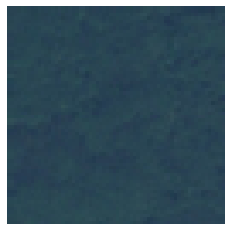

In [ ]:
random_image = random.sample(green_area_dir,1)
img_data = mpim.imread(random_image[0])
plt.imshow(img_data)
plt.axis(False);

##Creating a DataFrame of all train directories

In [ ]:
import pandas as pd
def create_dataframe(class_name,dir):
  df = pd.DataFrame(dir,columns=["dir"])
  df["classes"] = class_name
  return df

In [ ]:
class_names

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
cloudy_df = create_dataframe(class_names[0],cloudy_dir)
desert_df = create_dataframe(class_names[1],desert_dir)
green_area_df = create_dataframe(class_names[2],green_area_dir)
water_df = create_dataframe(class_names[3],water_dir)

In [ ]:
cloudy_vs_desert_df = desert_df.append(cloudy_df)
green_area_vs_water_df = green_area_df.append(water_df)

In [ ]:
multiclass_df = cloudy_vs_desert_df.append(green_area_vs_water_df,ignore_index=True)

In [ ]:
index_num = []
for index_val,data in enumerate(multiclass_df.dir):
  index_num.append(index_val)

In [ ]:
full_multiclass_df = cloudy_vs_desert_df.append(green_area_vs_water_df,ignore_index=True)
full_multiclass_df = pd.DataFrame(full_multiclass_df,index=index_num)
full_multiclass_df

,dir,classes
0,/content/drive/MyDrive/Satellite Image/data/de...,desert
1,/content/drive/MyDrive/Satellite Image/data/de...,desert
2,/content/drive/MyDrive/Satellite Image/data/de...,desert
3,/content/drive/MyDrive/Satellite Image/data/de...,desert
4,/content/drive/MyDrive/Satellite Image/data/de...,desert
...,...,...
5062,/content/drive/MyDrive/Satellite Image/data/wa...,water
5063,/content/drive/MyDrive/Satellite Image/data/wa...,water
5064,/content/drive/MyDrive/Satellite Image/data/wa...,water
5065,/content/drive/MyDrive/Satellite Image/data/wa...,water


##Changing the class_labels into boolean values

In [ ]:
full_multiclass_df.classes.value_counts()

cloudy        1350
green_area    1350
water         1350
desert        1017
Name: classes, dtype: int64

In [ ]:
labels = full_multiclass_df.classes.to_numpy()
labels

array(['desert', 'desert', 'desert', ..., 'water', 'water', 'water'],
      dtype=object)

In [ ]:
unique_labels = np.unique(labels)
unique_labels

array(['cloudy', 'desert', 'green_area', 'water'], dtype=object)

In [ ]:
boolean_labels = [label==unique_labels for label in labels]
len(boolean_labels)

5067

In [ ]:
dir_list = full_multiclass_df.dir
X = [x for x in dir_list]
len(X)

5067

In [ ]:
Y = boolean_labels
len(Y)

5067

##Making train_test_split with the train_datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_test)

(4053, 1014)

In [ ]:
import tensorflow as tf
def preprocessing_image(image_dir):
  image_dir = tf.io.read_file(image_dir)
  image_data = tf.image.decode_jpeg(image_dir,channels=3)
  image = tf.image.convert_image_dtype(image_data,tf.float32)
  image = tf.image.resize(image,size=(224,224))
  return image

In [ ]:
def image_label(image,label):
  return preprocessing_image(image),label

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.map(image_label).batch(32)
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.bool, name=None))>

In [ ]:
valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(x_test),tf.constant(y_test))).map(image_label).batch(32)
valid_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.bool, name=None))>

##Building Pixie

In [ ]:
Pixie = tf.keras.Sequential([tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(len(class_names),activation="softmax")])
Pixie.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
Pixie.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")
history_1 = Pixie.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                      validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/10
127/127 [==============================] - 12s 90ms/step - loss: 0.4081 - accuracy: 0.8228 - val_loss: 0.1821 - val_accuracy: 0.9221
Epoch 2/10
127/127 [==============================] - 11s 88ms/step - loss: 0.2035 - accuracy: 0.9141 - val_loss: 0.1529 - val_accuracy: 0.9398
Epoch 3/10
127/127 [==============================] - 10s 79ms/step - loss: 0.1978 - accuracy: 0.9109 - val_loss: 0.1792 - val_accuracy: 0.9162
Epoch 4/10
127/127 [==============================] - 10s 79ms/step - loss: 0.1862 - accuracy: 0.9206 - val_loss: 0.1795 - val_accuracy: 0.9231
Epoch 5/10
127/127 [==============================] - 10s 80ms/step - loss: 0.1807 - accuracy: 0.9262 - val_loss: 0.1354 - val_accuracy: 0.9458
Epoch 6/10
127/127 [==============================] - 10s 80ms/step - loss: 0.1721 - accuracy: 0.9247 - val_loss: 0.1234 - val_accuracy: 0.9477
Epoch 7/10
127/127 [==============================] - 10s 79ms/step - loss: 0.1612 - accuracy: 0.9307 - val_loss: 0.1266 - val_accuracy:

****
**As we can see our Pixie is doing great on our data**
****

##predicting image

In [ ]:
def predict_image(image,Pixie,class_names):
  image_data = mpim.imread(image)
  image_reshaped = tf.image.resize(image_data,size=(224,224))
  pred_prob = Pixie.predict(tf.expand_dims(image_reshaped,axis=0))
  # pred_prob = Pixie.predict(image_data)
  pred = np.argmax(pred_prob,axis=1)
  pred_class = class_names[pred[0]]
  
  plt.imshow(image_data)
  plt.title(f"prediction : {pred_class} {tf.reduce_max(pred_prob)*100}%")
  plt.axis(False)

In [ ]:
x = X[2000]
x

'/content/drive/MyDrive/Satellite Image/data/cloudy/train_7708.jpg'

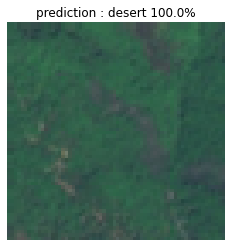

In [ ]:
predict_image(x,Pixie,class_names)

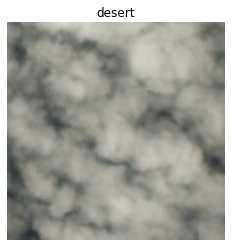

In [ ]:
img_data = mpim.imread(x)
img = tf.image.resize(img_data[:,:,:3],size=(224,224))
# print(img)
pred = Pixie.predict(tf.expand_dims(img,axis=0))
pred_label = np.argmax(pred,axis=1)
class_name =class_names[pred_label[0]]
plt.imshow(img_data)
plt.title(class_name)
plt.axis(False);

##Plotting Confusion matrix

In [ ]:
len(y_test)

In [ ]:
def predicting_for_c_m(Pixie,x_data,y_data=None,test_final_dataset=False):
  if not test_final_dataset:
    x_test_dataset = tf.data.Dataset.from_tensor_slices((x_data)).map(preprocessing_image).batch(32)
  else:
    x_test_dataset = tf.data.Dataset.from_tensor_slices((x_data)).map(preprocessing_image).shuffle(True).batch(32)
  
  pred = Pixie.predict(x_test_dataset)
  pred_label = np.argmax(pred,axis=1)
  
  y_test_one_hot = []
  if not test_final_dataset:
    for i in range(len(y_test)):
      y = y_test[i].astype(int)
      y_test_one_hot.append(y)
  
    df = pd.DataFrame(y_test_one_hot)
    y_test_one_hot = df.values
  else:
    for i in range(len(y_data)):
      y = y_test[i].astype(int)
      y_test_one_hot.append(y)
  
    df = pd.DataFrame(y_test_one_hot)
    y_test_one_hot = df.values

  
  from sklearn.metrics import confusion_matrix
  import seaborn as sb
  c_m = confusion_matrix(np.argmax(y_test_one_hot,axis=1),pred_label)
 
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,7))
  sb.heatmap(c_m,annot=True,fmt=".2f",xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])

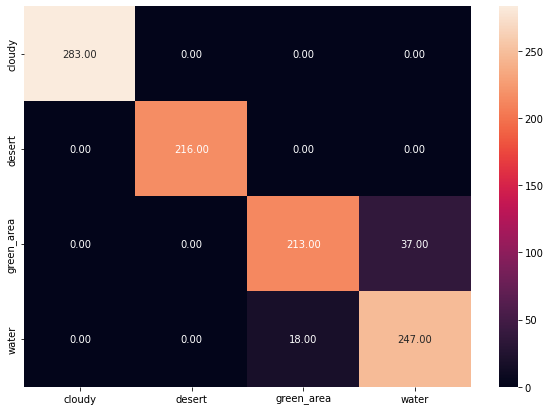

In [ ]:
predicting_for_c_m(Pixie,x_test)

###Explaining above function

In [ ]:
x_test_dataset = tf.data.Dataset.from_tensor_slices((x_test)).map(preprocessing_image).batch(32)
x_test_dataset

In [ ]:
pred = Pixie.predict(x_test_dataset)
pred

In [ ]:
pred_label = np.argmax(pred,axis=1)
pred_label

In [ ]:
y_test_one_hot = []
for i in range(len(y_test)):
  y = y_test[i].astype(int)
  y_test_one_hot.append(y)
# y_test_one_hot

In [ ]:
df = pd.DataFrame(y_test_one_hot)
df.head()

In [ ]:
y_test_one_hot = df.values
# pred_one_hot = one_hot_pred.values

In [ ]:
y_test_one_hot

In [ ]:
np.argmax(y_test_one_hot,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
c_m = confusion_matrix(np.argmax(y_test_one_hot,axis=1),pred_label)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sb.heatmap(c_m,annot=True,fmt=".2f",xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])

##Mobile Net V2 Pixie

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# base_Pixie = MobileNetV2(input_shape=[224,224,3],include_top=False)
# Pixie_1 = tf.keras.Sequential()
base_Pixie = MobileNetV2(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)

In [ ]:
base_Pixie.trainable = True  

for i in base_Pixie.layers[:100]: 
    base_Pixie.trainable = False
    
pool = tf.keras.layers.GlobalAveragePooling2D()
mid_layer = tf.keras.layers.Dense(100,activation = 'relu')
final_1 = tf.keras.layers.Dense(4,activation = 'softmax')

Pixie_1 = tf.keras.Sequential([base_Pixie, mid_layer,pool, final_1])
Pixie_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dense_7 (Dense)             (None, 7, 7, 100)         128100    
                                                                 
 global_average_pooling2d_2   (None, 100)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 4)                 404       
                                                                 
Total params: 2,386,488
Trainable params: 128,504
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
Pixie_1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
History = Pixie_1.fit(train_data,epochs = 15,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/15
127/127 [==============================] - 14s 89ms/step - loss: 0.0926 - accuracy: 0.9679 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 2/15
127/127 [==============================] - 11s 88ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0288 - val_accuracy: 0.9892
Epoch 3/15
127/127 [==============================] - 12s 94ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0343 - val_accuracy: 0.9862
Epoch 4/15
127/127 [==============================] - 11s 86ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0359 - val_accuracy: 0.9872
Epoch 5/15
127/127 [==============================] - 11s 87ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 6/15
127/127 [==============================] - 11s 87ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 7/15
127/127 [==============================] - 11s 86ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.0433 - val_accuracy:

##Checking on the testing data 

In [ ]:
desert_dir = make_directory(class_names[1],desert_test)
cloudy_dir = make_directory(class_names[0],cloudy_test)
green_area_dir = make_directory(class_names[2],green_area_test)
water_dir = make_directory(class_names[3],water_test)

In [ ]:
cloudy_df = create_dataframe(class_names[0],cloudy_dir)
desert_df = create_dataframe(class_names[1],desert_dir)
green_area_df = create_dataframe(class_names[2],green_area_dir)
water_df = create_dataframe(class_names[3],water_dir)

In [ ]:
cloudy_vs_desert_df = desert_df.append(cloudy_df)
green_area_vs_water_df = green_area_df.append(water_df)
full_multiclass_df = cloudy_vs_desert_df.append(green_area_vs_water_df)

In [ ]:
index_num = []
for index_val,data in enumerate(full_multiclass_df.dir):
  index_num.append(index_val)

In [ ]:
full_multiclass_df = cloudy_vs_desert_df.append(green_area_vs_water_df,ignore_index=True)
full_multiclass_df = pd.DataFrame(full_multiclass_df,index=index_num)
# full_multiclass_df

In [ ]:
labels = full_multiclass_df.classes.to_numpy()
# labels

In [ ]:
unique_labels = np.unique(labels)
unique_labels

array(['cloudy', 'desert', 'green_area', 'water'], dtype=object)

In [ ]:
boolean_labels = [label==unique_labels for label in labels]
len(boolean_labels)

564

In [ ]:
dir_list = full_multiclass_df.dir
X = [x for x in dir_list]
len(X)

564

In [ ]:
Y = boolean_labels
len(Y)

564

##Predicting images 

In [ ]:
len(X)

564

In [ ]:
x = X[333]
x

'/content/drive/MyDrive/Satellite Image/data/green_area/Forest_2810.jpg'

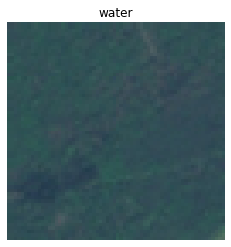

In [ ]:
img_data = mpim.imread(x)
img = tf.image.resize(img_data[:,:,:3],size=(224,224))
# print(img)
pred = Pixie_1.predict(tf.expand_dims(img,axis=0))
pred_label = np.argmax(pred,axis=1)
class_name =class_names[pred_label[0]]
plt.imshow(img_data)
plt.title(class_name)
plt.axis(False);

In [ ]:
# predict_image(x,Pixie,class_names)

##ConfusionMatrix

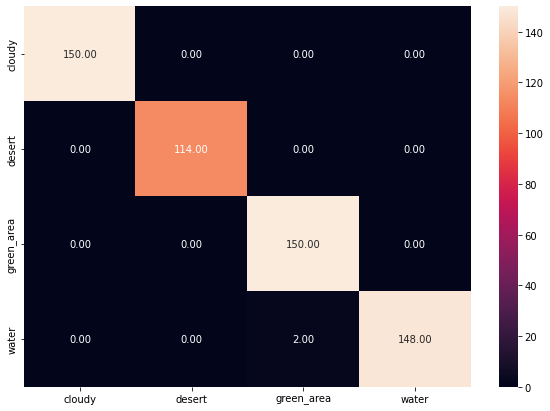

In [ ]:
test_final_dataset = True
x_data = X
y_test = Y
if not test_final_dataset:
  x_test_dataset = tf.data.Dataset.from_tensor_slices((x_data)).map(preprocessing_image).batch(32)
else:
  x_test_dataset = tf.data.Dataset.from_tensor_slices((x_data)).map(preprocessing_image).shuffle(True).batch(32)
  
pred = Pixie_1.predict(x_test_dataset)
pred_label = np.argmax(pred,axis=1)
  
y_test_one_hot = []
if not test_final_dataset:
  for i in range(len(y_test)):
    y = y_test[i].astype(int)
    y_test_one_hot.append(y)
  
  df = pd.DataFrame(y_test_one_hot)
  y_test_one_hot = df.values
else:
  for i in range(len(y_test)):
   y = y_test[i].astype(int)
   y_test_one_hot.append(y)
  
  df = pd.DataFrame(y_test_one_hot)
  y_test_one_hot = df.values

  
from sklearn.metrics import confusion_matrix
import seaborn as sb
c_m = confusion_matrix(np.argmax(y_test_one_hot,axis=1),pred_label)
 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sb.heatmap(c_m,annot=True,fmt=".2f",xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])

###Our Dense Pixie Confusion Matrix

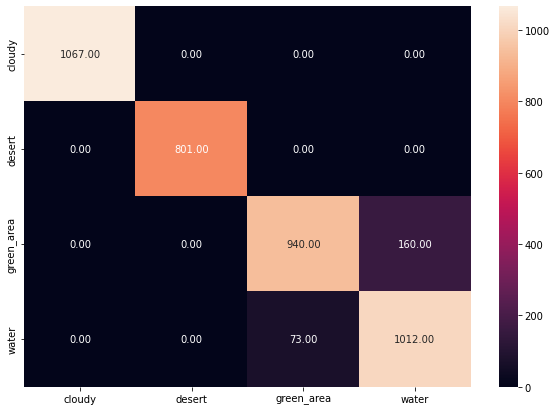

In [ ]:
x_test_dataset = tf.data.Dataset.from_tensor_slices((x_train)).map(preprocessing_image).shuffle(True).batch(32)
  
pred = Pixie.predict(x_test_dataset)
pred_label = np.argmax(pred,axis=1)
y_test_one_hot = []
for i in range(len(y_train)):
    y = y_train[i].astype(int)
    y_test_one_hot.append(y)
  
df = pd.DataFrame(y_test_one_hot)
y_test_one_hot = df.values

  
from sklearn.metrics import confusion_matrix
import seaborn as sb
c_m = confusion_matrix(np.argmax(y_test_one_hot,axis=1),pred_label)
 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sb.heatmap(c_m,annot=True,fmt=".2f",xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])